In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import kaggle
import zipfile
import mysql.connector



In [2]:
import kaggle 
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f country_dim.csv
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f shoes_dim.csv
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f shoes_fact.csv



Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
country_dim.csv: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
shoes_dim.csv: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
shoes_fact.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
df_country_dim = pd.read_csv('country_dim.csv')
df_shoes_dim = pd.read_csv('shoes_dim.csv')
df_shoes_fact = pd.read_csv('shoes_fact.csv')

In [4]:
#df_country_dim

#geting exchange rate
import pandas as pd
from pandas_datareader import data as pdr

#EUR to USD
exchange_rate = pdr.get_data_fred('DEXUSEU')
euro = exchange_rate.iloc[-1].values[0]# Get the latest rate
print(f'Latest EUR to USD: {euro}')

#GBP to USD
gbp_to_usd = pdr.get_data_fred('DEXUSUK')
pounds = gbp_to_usd.iloc[-1].values[0]# Get the latest rate
print(f"Latest GBP to USD rate: {pounds}")


df_country_dim['equal_to_usd'] = None

# Assign exchange rates based on currency type
for index, row in df_country_dim.iterrows():
    if row['currency'] == 'euro':
        df_country_dim.at[index, 'equal_to_usd'] = euro
    elif row['currency'] == 'pounds':
        df_country_dim.at[index, 'equal_to_usd'] = pounds
    else:
        df_country_dim.at[index, 'equal_to_usd'] = 1  # Default for other currencies

# Display the updated DataFrame
df_country_dim

Latest EUR to USD: 1.0826
Latest GBP to USD rate: 1.2942


,country_code,currency,shoe_metric,equal_to_usd
0,DE,euro,eu,1.0826
1,US,usd,usa,1
2,BE,euro,eu,1.0826
3,UK,pounds,uk,1.2942


In [5]:
#df_shoes_dim

duplicated = df_shoes_dim.duplicated().sum()
print(f'Duplicated rows: {duplicated}')


null = df_shoes_dim.isna().sum()
print(f'Nulls rows: {null}')

df_shoes_dim.drop('image_url', axis = 1, inplace = True)

df_shoes_dim

Duplicated rows: 0
Nulls rows: id                0
name              0
best_for_wear     0
gender            0
image_url         0
dominant_color    0
sub_color1        2
sub_color2        4
dtype: int64


,id,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,Grey One,Grey Three,Grey One
...,...,...,...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,Race,U,Screaming Orange,Cloud White,Bright Blue
3298,IE6438,Run 60s Shoes Kids,Walking,K,Cloud White,Collegiate Green,Collegiate Gold
3299,H02334,NMD_R1 Refined Shoes,Comfort,K,Cloud White,Cloud White,Grey One
3300,IF1360,F50 Pro Firm Ground Cleats Kids,Outside,K,Turbo,Aurora Black,Platinum Metallic


In [6]:
#df_shoes_fact

duplicated = df_shoes_fact.duplicated().sum()
print(f'Duplicated rows: {duplicated}')


null = df_shoes_fact.isna().sum()
print(f'Nulls rows: {null}')

df_shoes_fact.drop('Unnamed: 0', axis =1, inplace = True)
df_shoes_fact

Duplicated rows: 0
Nulls rows: Unnamed: 0      0
id              0
price           0
category        0
size            0
availability    0
date            0
country_code    0
dtype: int64


,id,price,category,size,availability,date,country_code
0,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE
...,...,...,...,...,...,...,...
299151,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE
299152,JI4476,160.0,sneakers,48,0,2025-01-16,BE
299153,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE
299154,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE


In [7]:
df_shoes_fact.info()

def unified_datefomat(date):
    try:
        return pd.to_datetime(date, format = '%d/%m/%Y') #convert '%d/%m/%Y' to datetime formaute
    except ValueError:
        return pd.to_datetime(date, format = '%Y-%m-%d')
df_shoes_fact['date'] = df_shoes_fact['date'].apply(unified_datefomat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            299156 non-null  object 
 1   price         299156 non-null  float64
 2   category      299156 non-null  object 
 3   size          299156 non-null  object 
 4   availability  299156 non-null  int64  
 5   date          299156 non-null  object 
 6   country_code  299156 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 16.0+ MB


In [8]:
#unify the terms for different category
df_shoes_fact['category'].unique()

def categorised(category):
    category = category.lower()

    if 'running' in category:
        return 'running'
    elif 'walking' in category:
        return 'walking'
    elif any(keyword in category for keyword in ['athletic', 'gym', 'workout']):
        return 'training'
    elif 'tennis' in category:
        return 'tennis'  # Corrected spelling from 'tennie'
    elif any(keyword in category for keyword in ['football', 'soccer']):
        return 'football'
    elif 'hiking' in category:
        return 'hiking'
    elif 'outdoor' in category:
        return 'outdoor'
    else:
        return 'sneakers'

df_shoes_fact['categorized'] = df_shoes_fact['category'].apply(categorised)

df_shoes_fact['categorized'].unique()


array(['sneakers', 'football', 'outdoor', 'running', 'walking',
       'training', 'tennis', 'hiking'], dtype=object)

# Sales performance 

- daily
- id
- category
- geographic

In [10]:
shoe_fact_dim_df = df_shoes_fact.merge(df_country_dim, on='country_code', how='left')


shoe_fact_dim_df['price_in_usd'] = shoe_fact_dim_df['price'] * shoe_fact_dim_df['equal_to_usd']
shoe_fact_dim_df


,id,price,category,size,availability,date,country_code,categorized,currency,shoe_metric,equal_to_usd,price_in_usd
0,HP9426,60.0,sneakers,36,0,2025-01-07,DE,sneakers,euro,eu,1.0826,64.956
1,HP9426,60.0,sneakers,36 2/3,0,2025-01-07,DE,sneakers,euro,eu,1.0826,64.956
2,HP9426,60.0,sneakers,37 1/3,0,2025-01-07,DE,sneakers,euro,eu,1.0826,64.956
3,HP9426,60.0,sneakers,38,0,2025-01-07,DE,sneakers,euro,eu,1.0826,64.956
4,HP9426,60.0,sneakers,38 2/3,1,2025-01-07,DE,sneakers,euro,eu,1.0826,64.956
...,...,...,...,...,...,...,...,...,...,...,...,...
299151,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE,sneakers,euro,eu,1.0826,173.216
299152,JI4476,160.0,sneakers,48,0,2025-01-16,BE,sneakers,euro,eu,1.0826,173.216
299153,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE,sneakers,euro,eu,1.0826,173.216
299154,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE,sneakers,euro,eu,1.0826,173.216


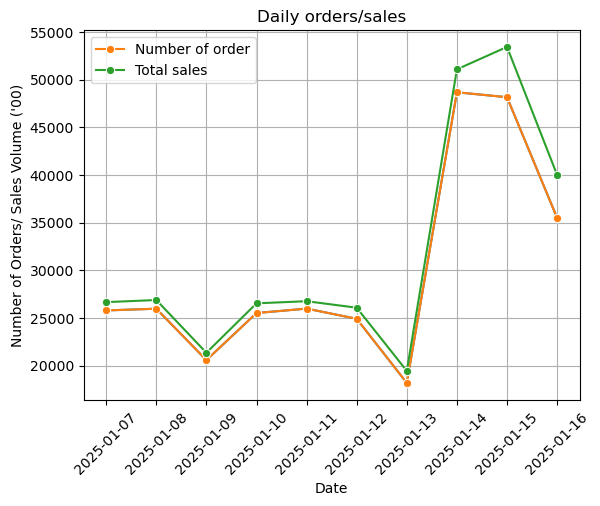

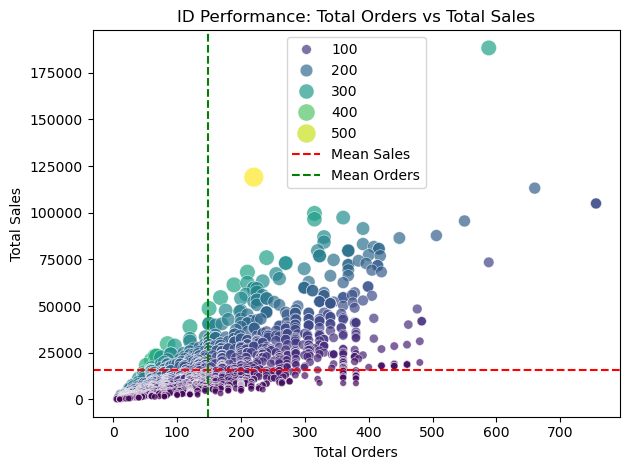

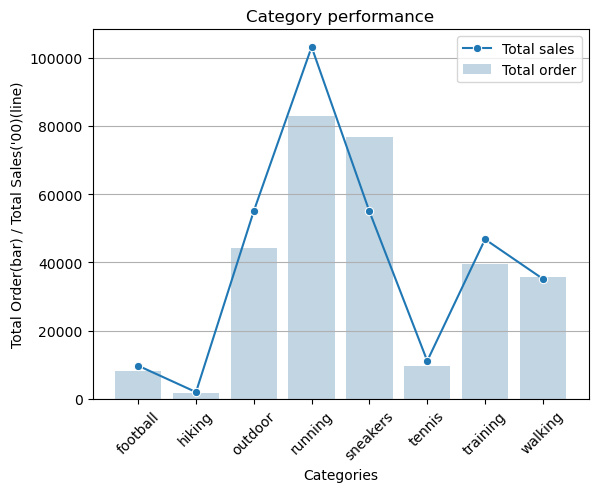

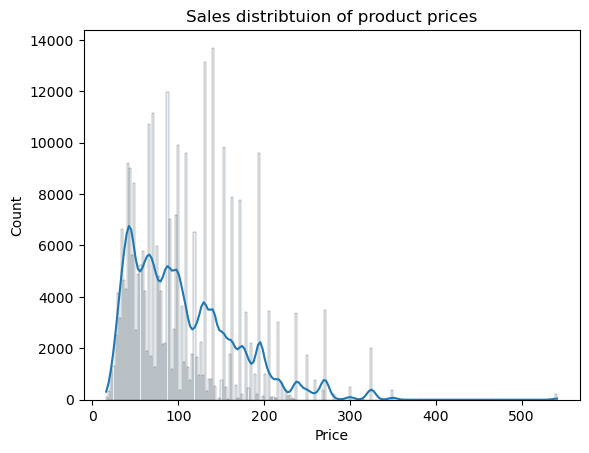

In [11]:
#Daily performance 
daily_order = shoe_fact_dim_df.groupby('date').size().reset_index(name = 'num_of_order')
daily_order

sns.lineplot(data = daily_order, x = 'date', y = 'num_of_order', marker = 'o')

daily_performance = shoe_fact_dim_df.groupby('date').agg(num_of_order = ('price_in_usd', 'size'),
                                                   total_sales = ('price_in_usd', 'sum')
                                                  ).reset_index()

daily_performance['total_sales'] = daily_performance['total_sales']/100

sns.lineplot(data = daily_performance, x = 'date', y = 'num_of_order', marker = 'o', label = 'Number of order')
sns.lineplot(data = daily_performance, x = 'date', y = 'total_sales', marker = 'o', label = 'Total sales')

plt.title('Daily orders/sales')
plt.xlabel('Date')
plt.ylabel("Number of Orders/ Sales Volume ('00)")
plt.xticks(rotation = 45)
plt.legend()
plt.grid()
plt.show()


#id performance
id_performance = shoe_fact_dim_df.groupby('id').agg(total_order = ('price_in_usd', 'size'),
                                                    total_sales = ('price_in_usd', 'sum')
                                                   ).reset_index()

id_performance['sales_per_order'] = id_performance['total_sales'] / id_performance['total_order']
id_performance.sort_values(by = 'sales_per_order', ascending = False, inplace = True)
id_performance


sns.scatterplot(data=id_performance, x='total_order', y='total_sales', hue = 'sales_per_order', 
                palette='viridis', size='sales_per_order', sizes=(20, 200), alpha=0.7)
plt.title('ID Performance: Total Orders vs Total Sales')
plt.xlabel('Total Orders')
plt.ylabel('Total Sales')
plt.axhline(y=id_performance['total_sales'].mean(), color='r', linestyle='--', label='Mean Sales')  # Optional: Mean line
plt.axvline(x=id_performance['total_order'].mean(), color='g', linestyle='--', label='Mean Orders')  # Optional: Mean line
plt.legend()
plt.tight_layout()
plt.show()



#category 
category_performance = shoe_fact_dim_df.groupby('categorized').agg(total_order = ('price_in_usd', 'size'),
                                                                   total_sales = ('price_in_usd', 'sum')
                                                                  ).reset_index()
category_performance['total_sales(,00)'] = category_performance['total_sales'] / 100

sns.barplot(data = category_performance, x = 'categorized', y = 'total_order', alpha = 0.3, label = 'Total order')
sns.lineplot(data = category_performance, x = 'categorized', y = 'total_sales(,00)', marker = 'o', label = 'Total sales')


plt.title('Category performance')
plt.xlabel('Categories')
plt.ylabel("Total Order(bar) / Total Sales('00)(line)")
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()


#sales distribution of product price
sns.histplot(data = shoe_fact_dim_df, x = 'price_in_usd', kde = True, alpha = 0.1, line_kws={'color': 'green'})

plt.title('Sales distribtuion of product prices')
plt.xlabel('Price')
plt.show()

# Market segmentation

- gender base analysis
- country specific trends

In [13]:
shoe_fact_dim_df

#selected items in df_shoe_dim
df_shoes_dim_simplifed = df_shoes_dim[['id','best_for_wear','gender','dominant_color']]
df_shoes_dim_simplifed


#duplicated ids
duplicates = df_shoes_dim_simplifed['id'].value_counts().reset_index(name='count')

# filter for ids that occur more than once
dup = duplicates[duplicates['count'] > 1]

# filter the original DataFrame for duplicate ids
df_duplicates = df_shoes_dim_simplifed[df_shoes_dim_simplifed['id'].isin(dup['id'])]

df_duplicates.sort_values(by = ['id', 'gender'], ascending = [True, False], inplace = True)

pd.set_option('display.max_rows', None)

df_duplicates


df_dup = df_duplicates.groupby('id').first().reset_index()
df_dup

uni = duplicates[duplicates['count'] == 1]
uni

df_uni = df_shoes_dim_simplifed[df_shoes_dim_simplifed['id'].isin(uni['id'])]
df_uni

df_shoe_dim_unique = pd.concat([df_dup, df_uni])
df_shoe_dim_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 0 to 3301
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2010 non-null   object
 1   best_for_wear   2010 non-null   object
 2   gender          2010 non-null   object
 3   dominant_color  2010 non-null   object
dtypes: object(4)
memory usage: 78.5+ KB


C:\Users\hosin\AppData\Local\Temp\ipykernel_16024\2557021333.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates.sort_values(by = ['id', 'gender'], ascending = [True, False], inplace = True)


In [14]:
#merge dfs
shoe = shoe_fact_dim_df.set_index('id')
uni_dim = df_shoe_dim_unique.set_index('id')

df = shoe.merge(uni_dim, left_index=True, right_index=True, how='left')

df.reset_index(inplace=True)



df[['equal_to_usd','price_in_usd']] = df[['equal_to_usd','price_in_usd']].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              299156 non-null  object        
 1   price           299156 non-null  float64       
 2   category        299156 non-null  object        
 3   size            299156 non-null  object        
 4   availability    299156 non-null  int64         
 5   date            299156 non-null  datetime64[ns]
 6   country_code    299156 non-null  object        
 7   categorized     299156 non-null  object        
 8   currency        299156 non-null  object        
 9   shoe_metric     299156 non-null  object        
 10  equal_to_usd    299156 non-null  int32         
 11  price_in_usd    299156 non-null  int32         
 12  best_for_wear   299156 non-null  object        
 13  gender          299156 non-null  object        
 14  dominant_color  299156 non-null  obj

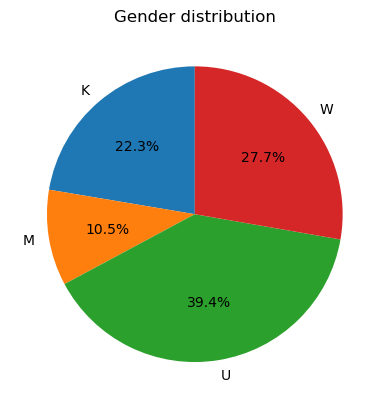

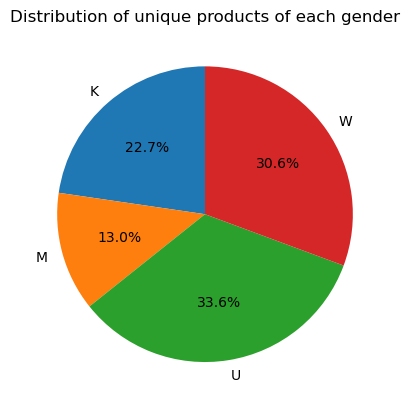

  gender   count        mean       sum
0      K   66849   48.720774   3256935
1      M   31386  112.180176   3520887
2      U  117956  129.448557  15269234
3      W   82965  116.111806   9633216

   gender categorized  counts  rank
27      W     running   29756   1.0
19      U     running   39093   1.0
11      M     running   10210   1.0
4       K    sneakers   35271   1.0


In [15]:
#Gender segmentation 

gender = df['gender'].value_counts().reset_index().sort_values(by = 'gender')
plt.pie(gender['count'], labels = gender['gender'], autopct = '%1.1f%%', startangle = 90)
plt.title('Gender distribution')
plt.show()

#unique product offerings of eahc gender 
uni_ids_gen = df.groupby('gender')['id'].nunique().reset_index().sort_values(by = 'gender')
plt.pie(uni_ids_gen['id'], labels=uni_ids_gen['gender'], autopct='%1.1f%%', startangle = 90)
plt.title('Distribution of unique products of each gender')
plt.show()

#gender sales distribution 
gender_analysis = df.groupby('gender')['price_in_usd'].agg(['count', 'mean', 'sum']).reset_index()
print(gender_analysis)
print()

#most popular category of each gender 
cat_gen = df.groupby(['gender','categorized']).size().reset_index(name = 'counts')
cat_gen.sort_values(by = ['gender','counts'], ascending = False, inplace = True)
cat_gen['rank'] = cat_gen.groupby('gender')['counts'].rank(method = 'dense', ascending = False)
pop_cat = cat_gen[cat_gen['rank'] ==1]
print(pop_cat)


# Country segmentation 

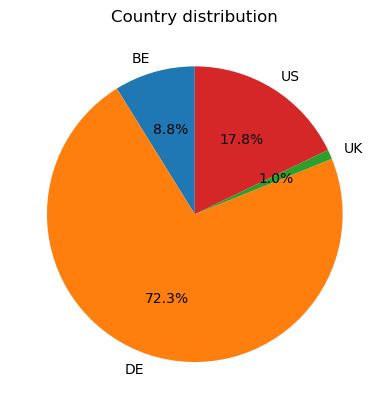

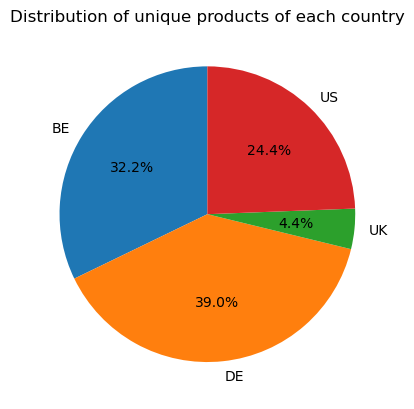

Underperforming category of each country:
   country_code categorized  counts  rank
19           US      tennis     274   1.0
14           UK    sneakers    3133   1.0
7            DE    football    4127   1.0
0            BE    football     391   1.0
Desciptive statistics:
  country_code   count        mean          sum  median        std
0           BE   26453   95.360994   2522584.37    80.0  56.930091
1           DE  216202   95.981405  20751371.69    81.4  57.475643
2           UK    3133   63.584743    199211.00    40.0  47.956593
3           US   53368  119.122845   6357348.00   100.0  58.530384


In [17]:
#country distribution
country = df['country_code'].value_counts().reset_index().sort_values(by = 'country_code')
plt.pie(country['count'], labels = country['country_code'], autopct = '%1.1f%%', startangle = 90)
plt.title('Country distribution')
plt.show()

#unique product offerings of each gender 
uni_ids_country = df.groupby('country_code')['id'].nunique().reset_index().sort_values(by = 'country_code')
plt.pie(uni_ids_country['id'], labels=uni_ids_country['country_code'], autopct='%1.1f%%', startangle = 90)
plt.title('Distribution of unique products of each country')
plt.show()

#poor category performance of each country - advice to remove from the corresponding country / improve marketing effort 
cat_country = df.groupby(['country_code','categorized']).size().reset_index(name = 'counts')
cat_country.sort_values(by = ['country_code','counts'], ascending = False, inplace = True)
cat_country['rank'] = cat_country.groupby('country_code')['counts'].rank(method = 'dense', ascending = True)
country_ids = cat_country[cat_country['rank'] ==1]
print('Underperforming category of each country:')
print(country_ids)

#descriptive statistics of countries
country_trends = df.groupby('country_code')['price'].agg(['count', 'mean', 'sum', 'median', 'std']).reset_index()
print('Desciptive statistics:') 
print(country_trends)



gender            K      M      U      W
country_code                            
BE             6898   1516  10992   7047
DE            50760  16111  86395  62936
UK             1609     35   1128    361
US             7582  13724  19441  12621


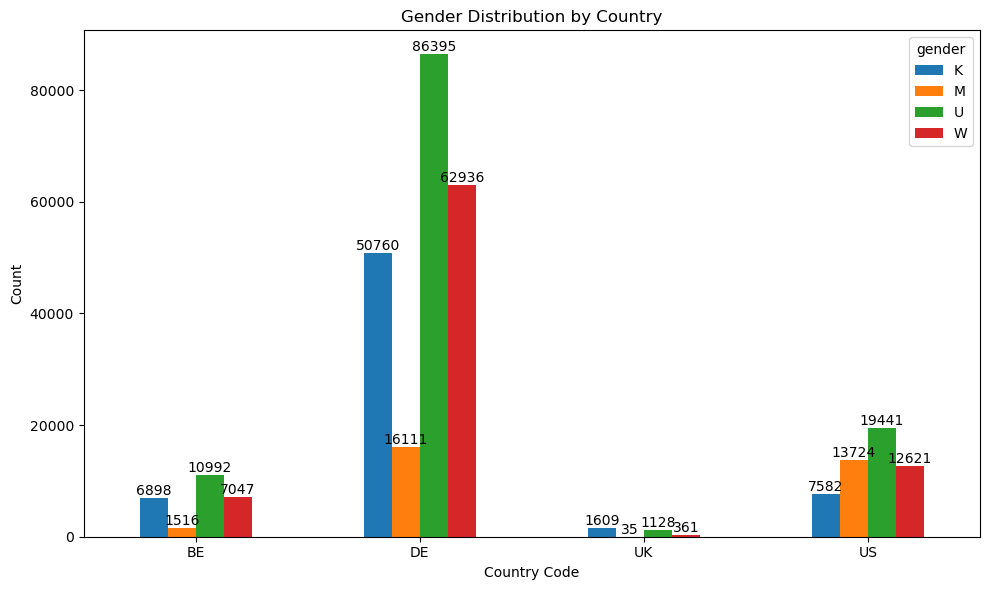

In [18]:
#gender and country dustribution 
gender_country = df.groupby(['country_code', 'gender']).size().unstack(fill_value=0)  # Convert df to pivot
print(gender_country)

# calculate the total counts for each country
totals = gender_country.sum(axis=1)

# visualise
ax = gender_country.plot(kind='bar', figsize=(10, 6))

# annotate the bars with counts and percentages
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f'{int(i.get_height())}', ha='center', va='bottom')

plt.title('Gender Distribution by Country')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks() 
plt.tight_layout()  
plt.show()

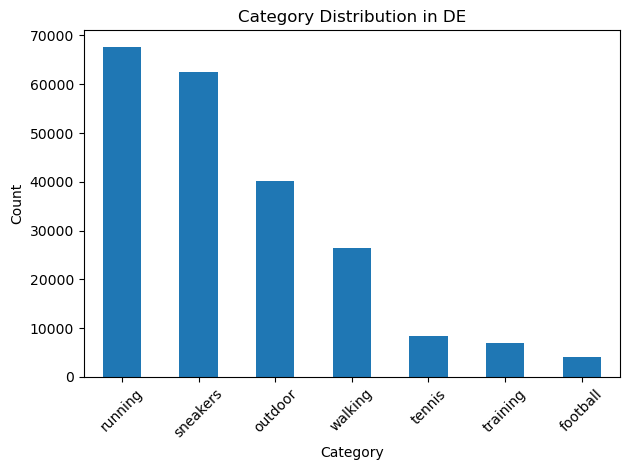

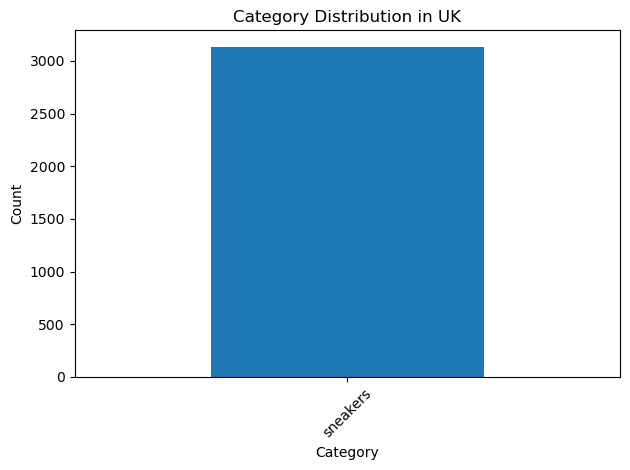

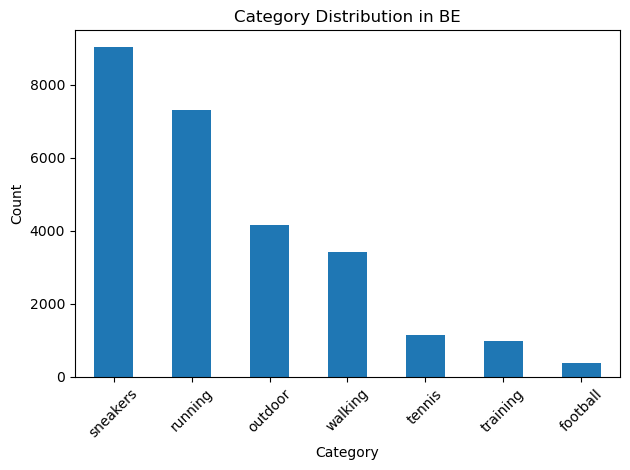

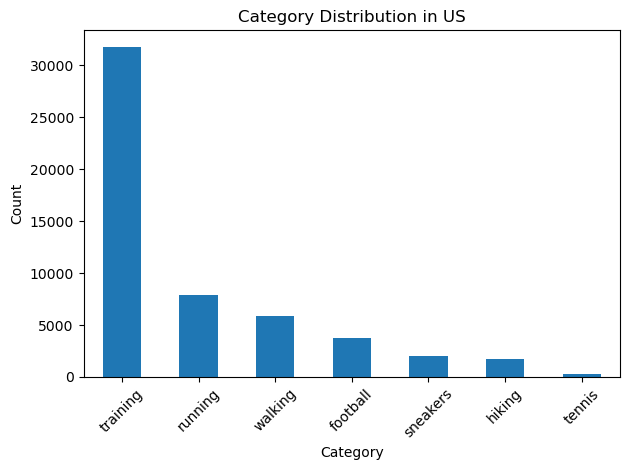

In [19]:
#category distribution in each geography
country_codes = df['country_code'].unique()

result={}
for country in country_codes:
    filtered_data = df[df['country_code'] == country]
    category_count = filtered_data['categorized'].value_counts()
    result[country] = category_count
'''
for country, counts in result.items():
    print(f"Country Code: {country}")
    print(counts)
    print()  # For better readability
'''
for country, counts in result.items():
    counts.plot(kind='bar')
    plt.title(f'Category Distribution in {country}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




# Average price of each category by region 


categorized     football      hiking     outdoor     running    sneakers  \
country_code                                                               
BE             99.092072    0.000000  123.444498  124.958436   73.187002   
DE             99.438091    0.000000  123.851639  123.408668   68.008734   
UK              0.000000    0.000000    0.000000    0.000000   81.801787   
US            138.064133  116.906141    0.000000  128.555047  138.090645   

categorized       tennis    training     walking  
country_code                                      
BE            114.243945  129.875890   96.480234  
DE            112.582636  129.741484   95.418472  
UK              0.000000    0.000000    0.000000  
US            130.613139  114.821343  110.997106  


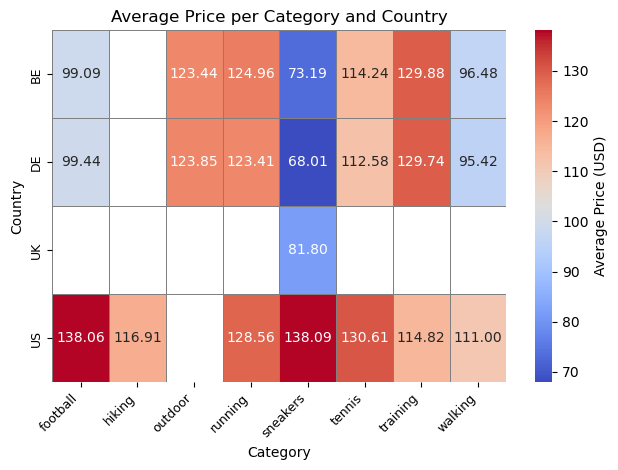

In [21]:
avg_price_of_each_cat_in_each_region = df.groupby(['country_code','categorized'])['price_in_usd'].mean().reset_index()

pivot_table = avg_price_of_each_cat_in_each_region.pivot(index='country_code', columns='categorized', values='price_in_usd')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

#visualise
'''
plt.figure(figsize = (12,8))
sns.barplot(data = avg_price_of_each_cat_in_each_region, x = 'categorized', y = 'price_in_usd' , hue = 'country_code')
plt.show()
'''

cat_gountry_price = df.groupby(['country_code','categorized'])['price_in_usd'].mean().unstack()
sns.heatmap(cat_gountry_price, annot = True, fmt = '.2f',cmap = 'coolwarm', 
            cbar = True, cbar_kws = {'label':'Average Price (USD)'}, linewidths = 0.5, linecolor = 'gray')

plt.title('Average Price per Category and Country') 
plt.xlabel('Category', fontsize=10) 
plt.ylabel('Country', fontsize=10) 
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout() 
plt.show()


# price sensitivty 

C:\Users\hosin\AppData\Local\Temp\ipykernel_16024\1357447146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


Text(0, 0.5, 'Price (USD)')

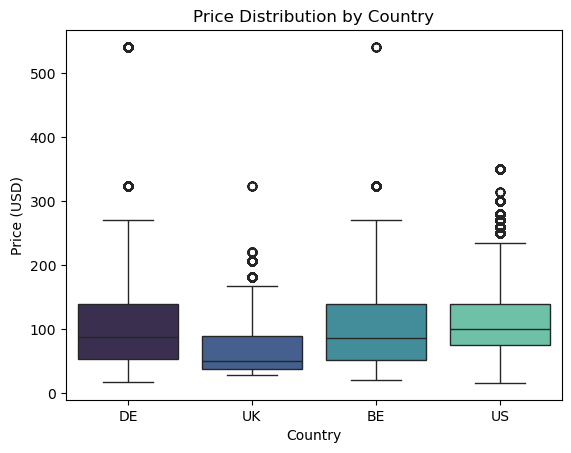

In [23]:

price_summary = df.groupby('country_code')['price_in_usd'].describe().reset_index()
price_summary

sns.boxplot(data = df,
             x = 'country_code',
             y = 'price_in_usd',
            palette = 'mako')

plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')

# Color preference 


6647.91

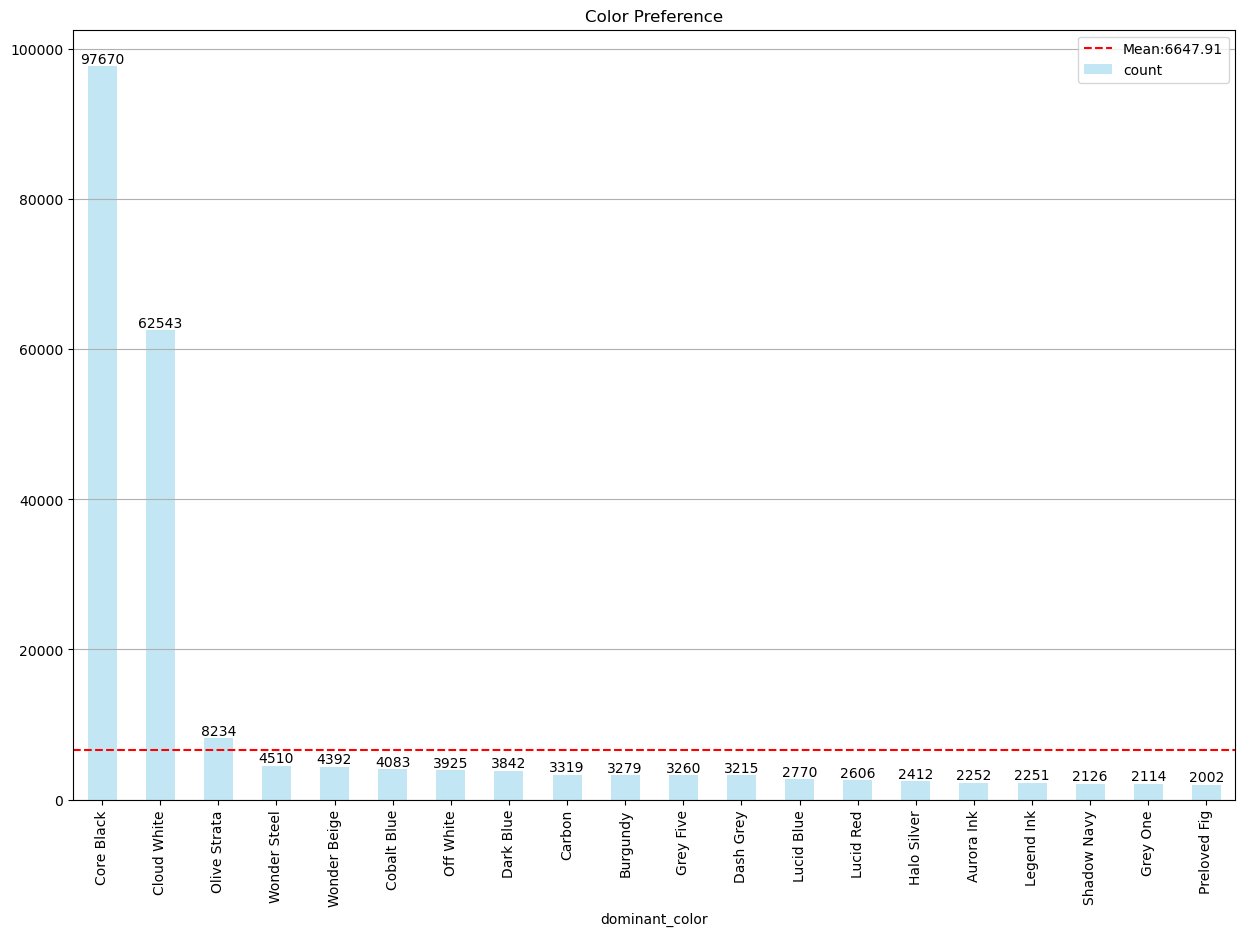

In [25]:
color_pref = df['dominant_color'].value_counts()
color_pref.sort_values(ascending = False, inplace = True)


color_pref = color_pref.nlargest(20)

mean = round(df['best_for_wear'].value_counts().mean(),2)


color_pref.plot(kind='bar', alpha =0.5, figsize = (15,10), color ='skyblue')

for i, count in enumerate(color_pref):
    plt.text(i, count, f'{count}', ha = 'center', va = 'bottom')
    
plt.title('Color Preference')
plt.axhline(mean, color = 'r', linestyle = '--', label = f'Mean:{mean}')
plt.legend()
plt.grid(axis = 'y')

mean

# best for wear

        best_for_wear  counts
0             Neutral  119045
1              Racing   36230
2            Everyday   18448
3                City   15157
4             Comfort   14004
5          Day Hiking   11367
6             Walking   10606
7        Padel Tennis    7073
8           Trail Run    6663
9           Off-Court    6222
10          Stability    5055
11        Staying Dry    4600
12            Stadium    3910
13       All Mountain    3250
14     Rugged Terrain    2588
15           On-Court    2573
16           Trekking    2560
17            Outside    1990
18      Long Distance    1876
19  Hiking & Trekking    1787
20       Staying Cool    1638
21           Strength    1612
22               Race    1491
23         Pickleball    1490
24        All-rounder    1407
25      Dirt / Casual    1400
26                Run    1377
27               HIIT    1302
28            Control    1275
29            Agility    1274
30         Flat Pedal    1200
31       Staying Warm    1187
32        

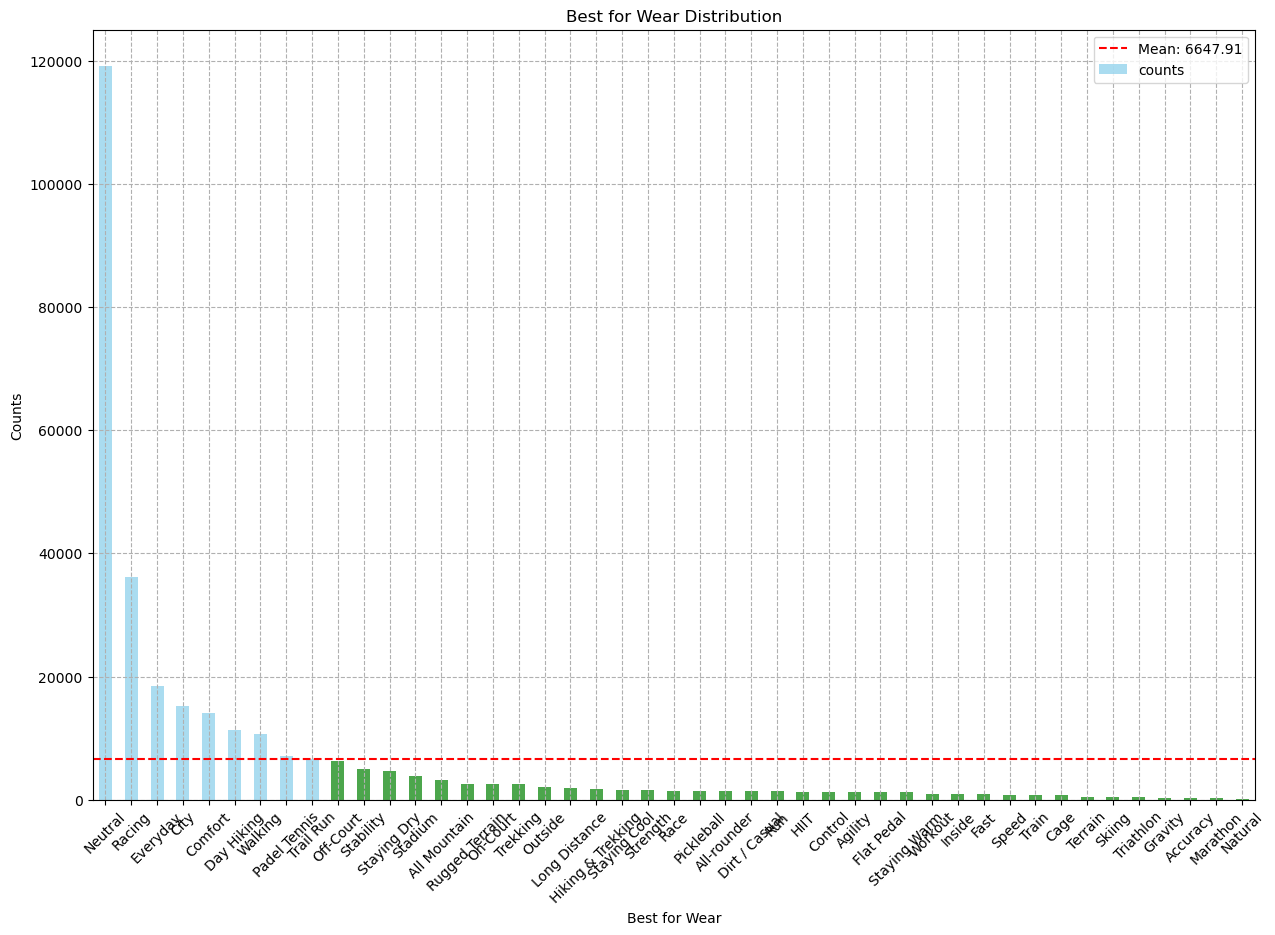

In [27]:
# Count occurrences of each category
best_for_wear = df['best_for_wear'].value_counts().reset_index(name='counts')

# sort the values in descending order
best_for_wear.sort_values(by='counts', ascending=False, inplace=True)
print(best_for_wear)

# calculate the mean
mean = round(best_for_wear['counts'].mean(), 2)
print(f'Mean: {mean}')

# define colors based on the condition
colors = ['skyblue' if count > mean else 'green' for count in best_for_wear['counts']]

# create the bar plot with specified colors
best_for_wear.plot(x='best_for_wear', y='counts', kind='bar', alpha=0.7, figsize=(15, 10), color=colors)

plt.axhline(mean, color='r', linestyle='--', label=f'Mean: {mean}')
plt.title('Best for Wear Distribution')
plt.xticks(rotation=45)
plt.xlabel('Best for Wear')
plt.ylabel('Counts')
plt.legend()
plt.grid(linestyle='--')
plt.show()

# automation for low stock detection 


- assume the ordered will be send from the inventory directly, shop stock is for retail purpose, so the number of unit ordered does not affect avaliability

- the restock quantity will be determing by the last record of each id and size 

- order to be place twice a week on mon and thu

In [29]:
#report generate 
from datetime import datetime, timedelta
import mysql.connector 


#update df_status daily 
#assume the csv is schedule to be update in mysql every day 
def update_df():
    #connect to mysql 
    try: 
        connection = mysql.connector.connect(
            user = 'root',
            password = '*************',
            host = '127.0.0.1',
            port = '3306',
            database = 'adidas_show_data'
        )

        #query for filtering stock health
        query = """
        SELECT * FROM stock_status
        WHERE stock_health IN('low (restock ASAP)','Medium (order to be placed)')
        """

        df_status = pd.read_sql(query, connection)

        df_status.to_csv('stock_status.csv', index = False)
        print(f'Dataframe updated successfully on {datetime.now()}.')

    except mysql.connector.Error as err:
        print(f'Error: {err}')

    finally:
        if connection.is_connected():
            connection.close()

#generate report 
def generate_restock_report(df_status):
    #filter low stock ids
    low_stock = df_status[df_status['stock_health'] == 'low (restock ASAP)']

    #filter medium stock 
    med_stock = df_status[df_status['stock_health'] == 'Medium (order to be placed)']

    #create report 
    report = {
    'Low Stock': low_stock[['id','size','availability','stock_health']],
    'Medium Stock': med_stock[['id','size','availability','stock_health']]
    }

    return report 

def check_and_generate_report():
    today = datetime.now()
    next_monday = today + timedelta(days = (7 - today.weekday())) if today.weekday() != 0 else today 
    next_thursday = today + timedelta(days = (3 - today.weekday())) if today.weekday() != 3 else today 

    
    #check if today is monday or thursday 
    if today.weekday() in [0,3]: #0 = mon, 3 = thu
        # Update df_status before generating report
        update_df()
        
        #read the updated CSV to generate the report
        df_status = pd.read_csv('stock_status.csv')
        restock_report = generate_restock_report(df_status)
        
        
        #display the report
        print("Restock Report:")
        print("\nLow Stock:")
        print(restock_report['Low Stock'])
        print("\nMedium Stock:")
        print(restock_report['Medium Stock'])
    else:
        print("Today is not a scheduled report day.")



if __name__ == '__main__':
    #update_df() #update the df daily 
    check_and_generate_report() #generate report if today is schedule 


#next step open terminal 
#type crontab -e to edit your cron jobs.
#add a line to run the script daily at a specified time (e.g., 6 AM)
#0 6 * * * /usr/bin/python3 /path/to/your_script.py >> /path/to/logfile.log 2>&1


Today is not a scheduled report day.
